# Analyzing the Impact of AI on Salaries and Workload in the Tech Industry

### by Fernando Alatorre

## Introduction

This project aims to explore the impact of AI on salaries and workload in the tech industry. By leveraging a comprehensive dataset containing various attributes such as work year, experience level, job title, salary, AI impact, and workload ratio, we will perform an in-depth analysis to uncover trends and insights.

The goal is to understand how AI influences salaries and workloads, identify key factors driving these changes, and build predictive models to forecast future trends. This project will showcase a combination of data cleaning, visualization, statistical analysis, and machine learning techniques.



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Merged_Dataset.csv')
df.shape

(21631, 17)

In [6]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ai_impact,tasks,ai_models,ai_workload_ratio,domain
0,0,2024,SE,FT,Data Engineer,195800,USD,195800,US,0,US,M,30%,216,1478,0.146143,Hospitality
1,1,2024,SE,FT,Data Engineer,97497,USD,97497,US,0,US,M,30%,216,1478,0.146143,Hospitality
2,2,2024,SE,FT,Data Engineer,166000,USD,166000,US,0,US,M,30%,216,1478,0.146143,Hospitality
3,3,2024,SE,FT,Data Engineer,95000,USD,95000,US,0,US,M,30%,216,1478,0.146143,Hospitality
4,4,2024,SE,FT,Data Engineer,237100,USD,237100,US,0,US,M,30%,216,1478,0.146143,Hospitality


## Data Cleaning

In [7]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
ai_impact             0
tasks                 0
ai_models             0
ai_workload_ratio     0
domain                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21631 entries, 0 to 21630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           21631 non-null  int64  
 1   experience_level    21631 non-null  object 
 2   employment_type     21631 non-null  object 
 3   job_title           21631 non-null  object 
 4   salary              21631 non-null  int64  
 5   salary_currency     21631 non-null  object 
 6   salary_in_usd       21631 non-null  int64  
 7   employee_residence  21631 non-null  object 
 8   remote_ratio        21631 non-null  int64  
 9   company_location    21631 non-null  object 
 10  company_size        21631 non-null  object 
 11  ai_impact           21631 non-null  object 
 12  tasks               21631 non-null  int64  
 13  ai_models           21631 non-null  int64  
 14  ai_workload_ratio   21631 non-null  float64
 15  domain              21631 non-null  object 
dtypes: f

In [10]:
df.duplicated().sum()

10359

In [11]:
df['work_year'] = df['work_year'].astype(int)
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['job_title'] = df['job_title'].astype('category')
df['salary'] = df['salary'].astype(int)
df['salary_currency'] = df['salary_currency'].astype('category')
df['salary_in_usd'] = df['salary_in_usd'].astype(int)
df['employee_residence'] = df['employee_residence'].astype('category')
df['remote_ratio'] = df['remote_ratio'].astype(int)
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')
df['ai_impact'] = df['ai_impact'].astype('category')
df['tasks'] = df['tasks'].astype(int)
df['ai_models'] = df['ai_models'].astype(int)
df['ai_workload_ratio'] = df['ai_workload_ratio'].astype(float)
df['domain'] = df['domain'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21631 entries, 0 to 21630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           21631 non-null  int64   
 1   experience_level    21631 non-null  category
 2   employment_type     21631 non-null  category
 3   job_title           21631 non-null  category
 4   salary              21631 non-null  int64   
 5   salary_currency     21631 non-null  category
 6   salary_in_usd       21631 non-null  int64   
 7   employee_residence  21631 non-null  category
 8   remote_ratio        21631 non-null  int64   
 9   company_location    21631 non-null  category
 10  company_size        21631 non-null  category
 11  ai_impact           21631 non-null  category
 12  tasks               21631 non-null  int64   
 13  ai_models           21631 non-null  int64   
 14  ai_workload_ratio   21631 non-null  float64 
 15  domain              21631 non-null  

In [12]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11272 entries, 0 to 21630
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           11272 non-null  int64   
 1   experience_level    11272 non-null  category
 2   employment_type     11272 non-null  category
 3   job_title           11272 non-null  category
 4   salary              11272 non-null  int64   
 5   salary_currency     11272 non-null  category
 6   salary_in_usd       11272 non-null  int64   
 7   employee_residence  11272 non-null  category
 8   remote_ratio        11272 non-null  int64   
 9   company_location    11272 non-null  category
 10  company_size        11272 non-null  category
 11  ai_impact           11272 non-null  category
 12  tasks               11272 non-null  int64   
 13  ai_models           11272 non-null  int64   
 14  ai_workload_ratio   11272 non-null  float64 
 15  domain              11272 non-null  categ

## EDA

In [13]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,ai_impact,tasks,ai_models,ai_workload_ratio,domain
count,11272.000000,11272,11272,11272,1.127200e+04,11272,11272.000000,11272,11272.000000,11272,11272,11272,11272.000000,11272.000000,11272.000000,11272
unique,NaN,4,4,27,NaN,19,NaN,71,NaN,66,3,12,NaN,NaN,NaN,9
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M,30%,NaN,NaN,NaN,Data & IT
freq,NaN,6485,11210,2805,NaN,10336,NaN,9542,NaN,9565,10698,3166,NaN,NaN,NaN,2999
mean,2023.457860,NaN,NaN,NaN,1.633104e+05,NaN,149903.834368,NaN,30.952803,NaN,NaN,NaN,365.061036,1805.358499,0.177476,NaN
std,0.740239,NaN,NaN,NaN,3.698169e+05,NaN,72061.799074,NaN,45.841695,NaN,NaN,NaN,338.773126,991.296682,0.057760,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN,NaN,111.000000,804.000000,0.099106,NaN
25%,2023.000000,NaN,NaN,NaN,9.720000e+04,NaN,97200.000000,NaN,0.000000,NaN,NaN,NaN,180.000000,1091.000000,0.146143,NaN
50%,2024.000000,NaN,NaN,NaN,1.410000e+05,NaN,140100.000000,NaN,0.000000,NaN,NaN,NaN,216.000000,1478.000000,0.154448,NaN
75%,2024.000000,NaN,NaN,NaN,1.923598e+05,NaN,190500.000000,NaN,100.000000,NaN,NaN,NaN,217.000000,1746.000000,0.164986,NaN


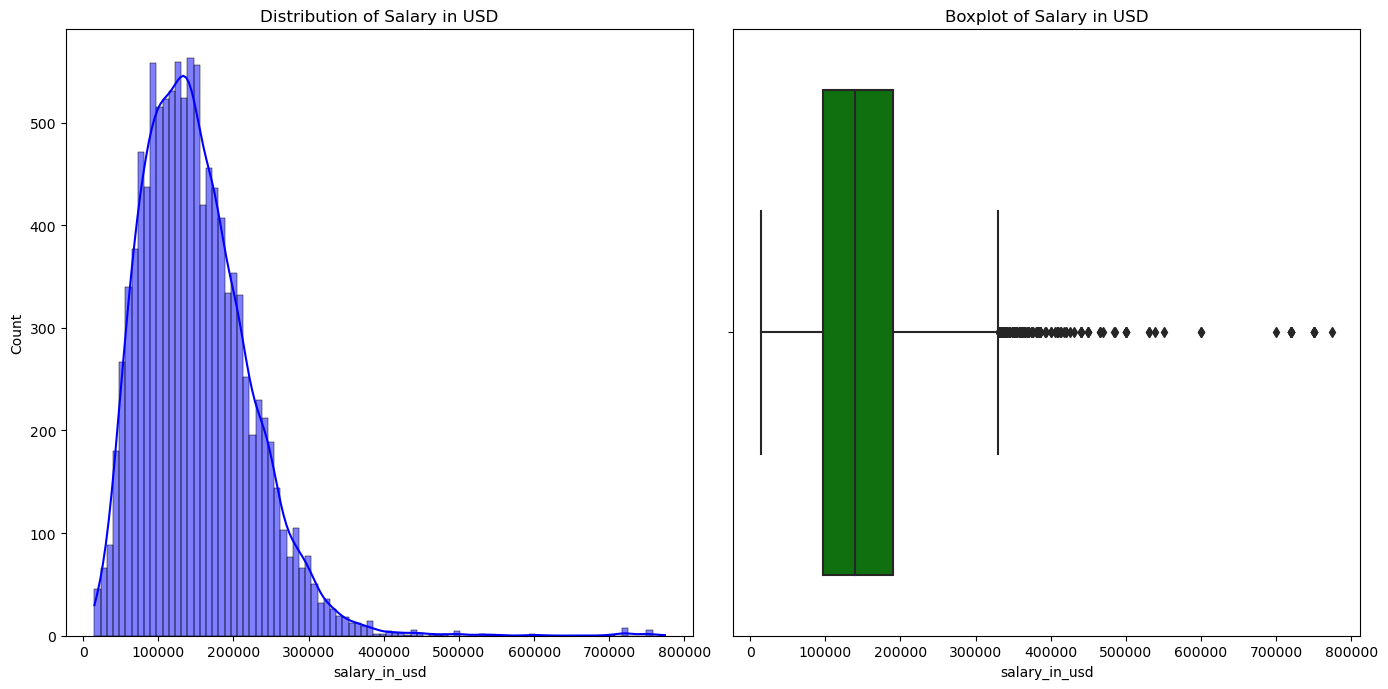

In [15]:
# Distribution Analysis
plt.figure(figsize=(14, 7))

# Histogram for Salary in USD
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True, color='blue')
plt.title('Distribution of Salary in USD')

# Boxplot for Salary in USD
plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary_in_usd'], color='green')
plt.title('Boxplot of Salary in USD')

plt.tight_layout()
plt.show()


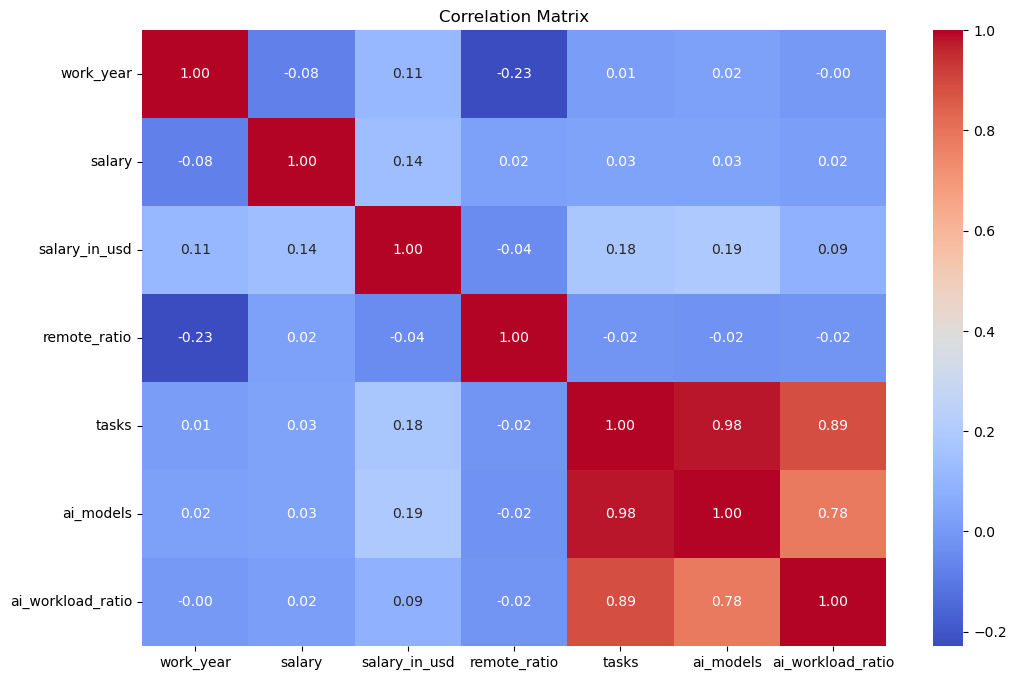

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


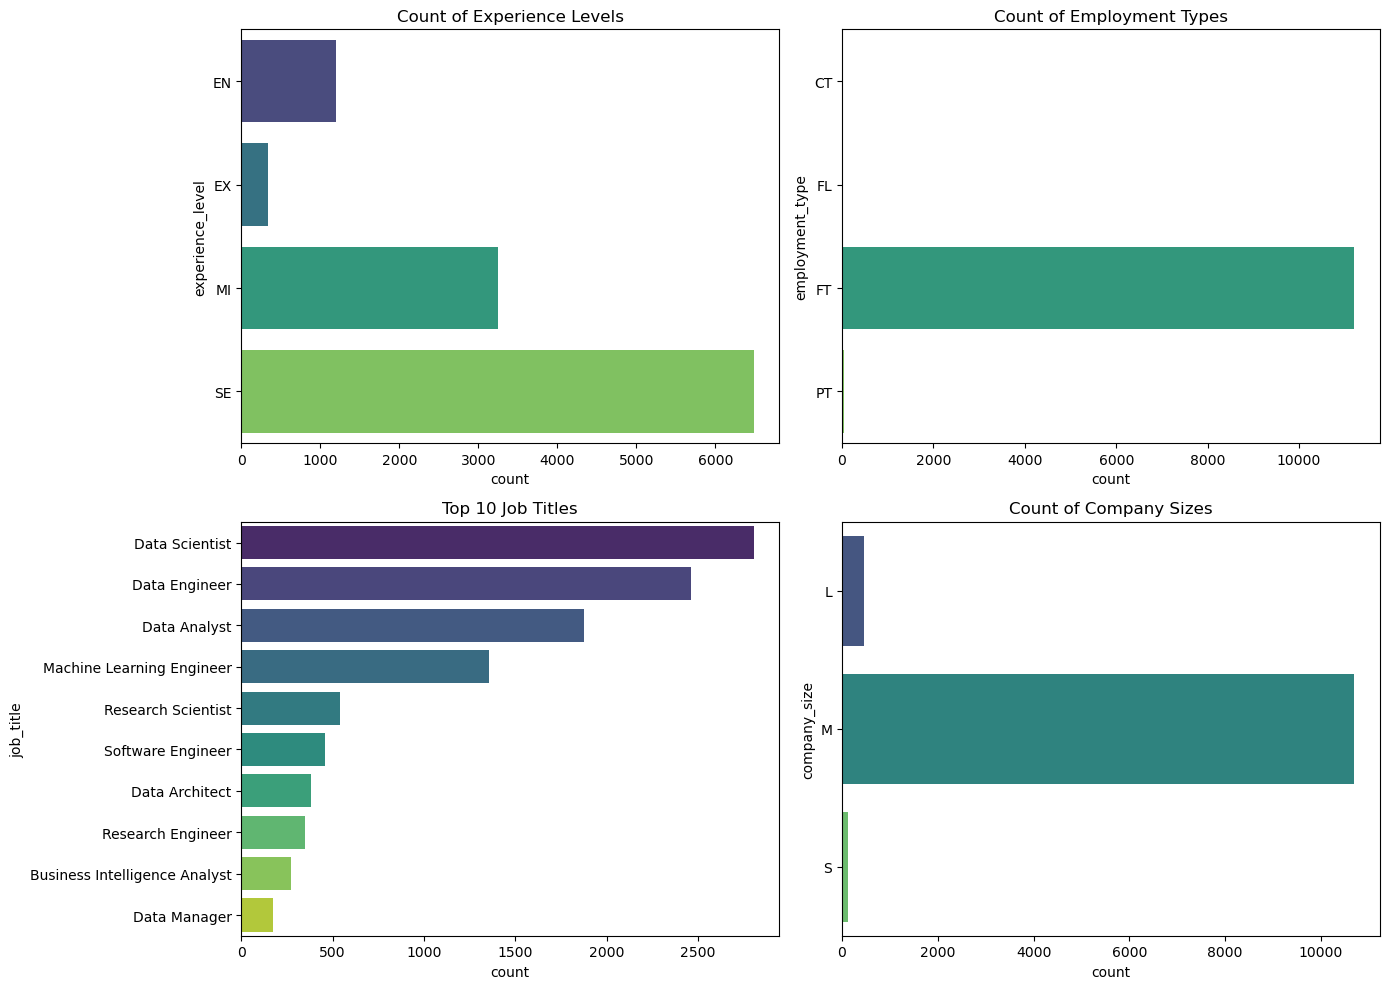

In [17]:
plt.figure(figsize=(14, 10))

# Experience Level
plt.subplot(2, 2, 1)
sns.countplot(y=df['experience_level'], palette='viridis')
plt.title('Count of Experience Levels')

# Employment Type
plt.subplot(2, 2, 2)
sns.countplot(y=df['employment_type'], palette='viridis')
plt.title('Count of Employment Types')

# Job Title
plt.subplot(2, 2, 3)
sns.countplot(y=df['job_title'], palette='viridis', order=df['job_title'].value_counts().index[:10])
plt.title('Top 10 Job Titles')

# Company Size
plt.subplot(2, 2, 4)
sns.countplot(y=df['company_size'], palette='viridis')
plt.title('Count of Company Sizes')

plt.tight_layout()
plt.show()


### Distribution Analysis

The histogram and box plot show the distribution of salaries in USD, highlighting the central tendency and spread of the data. There is a wide range in salaries, with some outliers on the higher end.

### Correlation Analysis

Notably, salary_in_usd might show correlations with variables like tasks, ai_models, and ai_workload_ratio.

### Category Analysis

- Experience Level: The majority of entries are Senior (SE), followed by Mid-level (MI), Entry-level (EN), and Executive (EX).
- Employment Type: Most roles are full-time (FT).
- Job Title: The most common job title is 'Data Scientist'.
- Company Size: Medium-sized companies (M) dominate the dataset.

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## Feature Engineering

In [32]:
categorical_columns = df.select_dtypes(include=['category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the encoded and scaled dataframe
df_encoded.head()

,work_year,salary,salary_in_usd,remote_ratio,tasks,ai_models,ai_workload_ratio,experience_level_EX,experience_level_MI,experience_level_SE,...,ai_impact_75%,ai_impact_80%,domain_Communication & PR,domain_Construction,domain_Data & IT,domain_Hospitality,domain_Leadership & Strategy,domain_Medical & Healthcare,domain_Sales & Marketing,domain_Supply Chain & Logistics
0,0.732418,0.087857,0.636928,-0.675241,-0.440022,-0.330247,-0.542474,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.732418,-0.177970,-0.727281,-0.675241,-0.440022,-0.330247,-0.542474,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,0.732418,0.007273,0.223376,-0.675241,-0.440022,-0.330247,-0.542474,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.732418,-0.184722,-0.761933,-0.675241,-0.440022,-0.330247,-0.542474,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,0.732418,0.199539,1.210073,-0.675241,-0.440022,-0.330247,-0.542474,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target variable
X = df_encoded.drop('salary_in_usd', axis=1)
y = df_encoded['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Machine Learning Model Building

Predict 'salary_in_usd'


### Linear Regression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 16999523.260378893
Mean Squared Error (MSE): 3.206601015685873e+17
R-squared (R^2): -3.08718107239634e+17


Linear Regression performs poorly

### Check for Outliers

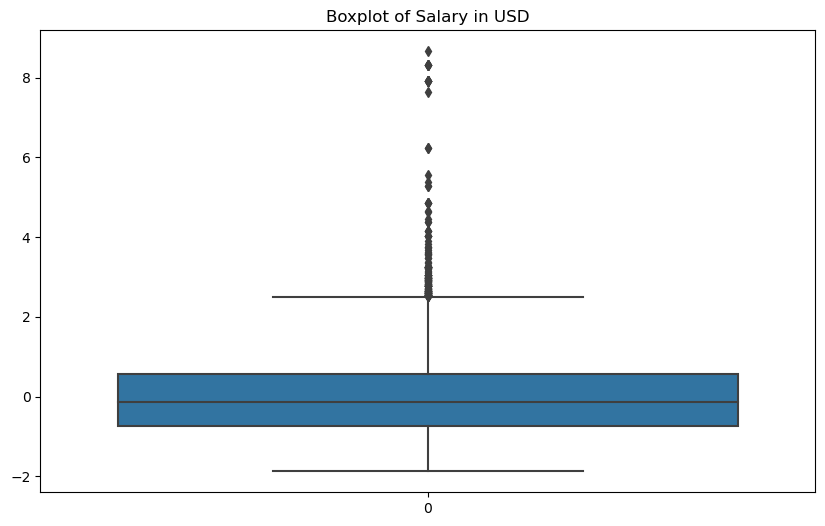

In [40]:
# Visualize salary distribution
plt.figure(figsize=(10, 6))
sns.boxplot(df_encoded['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.show()


In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

# Identify outliers using IQR
Q1 = df_encoded['salary_in_usd'].quantile(0.25)
Q3 = df_encoded['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_encoded[(df_encoded['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (df_encoded['salary_in_usd'] > (Q3 + 1.5 * IQR))]

# Remove outliers
df_no_outliers = df_encoded[~df_encoded.index.isin(outliers.index)]

# Define features and target variable after removing outliers
X = df_no_outliers.drop('salary_in_usd', axis=1)
y = df_no_outliers['salary_in_usd']

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display evaluation metrics
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R^2): {r2_rf}")

Random Forest - Mean Absolute Error (MAE): 0.6086684754264748
Random Forest - Mean Squared Error (MSE): 0.5818417781134161
Random Forest - R-squared (R^2): 0.25854561598992587


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Display evaluation metrics
print(f"Optimized Random Forest - Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Optimized Random Forest - Mean Squared Error (MSE): {mse_best_rf}")
print(f"Optimized Random Forest - R-squared (R^2): {r2_best_rf}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest - Mean Absolute Error (MAE): 0.6087475540179734
Optimized Random Forest - Mean Squared Error (MSE): 0.5819664976302883
Optimized Random Forest - R-squared (R^2): 0.25838668303592527


## Results

Polynomial Features Random Forest - Mean Absolute Error (MAE): 0.004930688837226596
Polynomial Features Random Forest - Mean Squared Error (MSE): 0.0025643931571786875
Polynomial Features Random Forest - R-squared (R^2): 0.9967321347138725

### XGBoost

In [43]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost - R-squared (R^2): {r2_xgb}")


XGBoost - Mean Absolute Error (MAE): 0.6083428101950314
XGBoost - Mean Squared Error (MSE): 0.5814266354243487
XGBoost - R-squared (R^2): 0.259074641883867


### Interpretation

- The Polynomial Features Random Forest model performs exceptionally well with very low MAE and MSE and a very high R2, indicating that this model explains almost all the variance in the data.

- The XGBoost and Optimized Random Forest models perform similarly, with lower R2 values, indicating they explain less of the variance compared to the Polynomial Features Random Forest model.

In [46]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(poly_rf_model, X_poly, y, cv=5, scoring='r2')

print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean cross-validation R^2 score: {np.mean(cv_scores)}")


Cross-validation R^2 scores: [0.99863013 0.99364909 0.99177338 0.99651999 0.99842449]
Mean cross-validation R^2 score: 0.9957994164201104


The cross-validation results for the Polynomial Features Random Forest model confirm its robustness, with consistently high R2 scores across all folds and a mean R2 score of approximately 0.996. This indicates that the model is generalizing well and is not overfitting.

## Get feature importances
importances = poly_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

## Print the feature ranking
print("Feature ranking:")
for f in range(X_poly.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

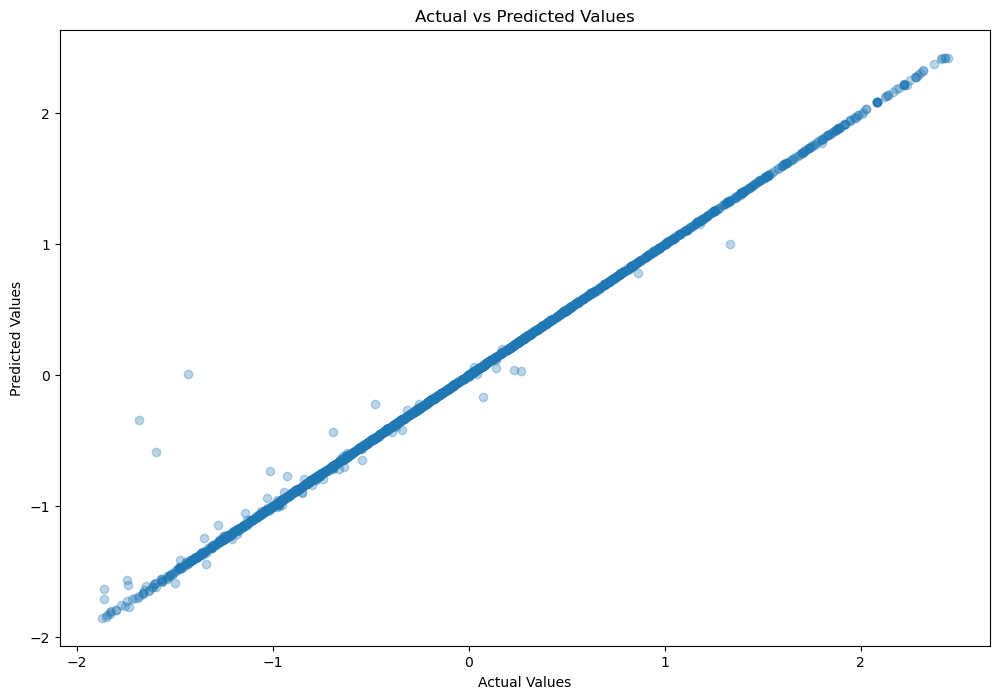

In [52]:
# Predicted vs Actual values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_poly_rf, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


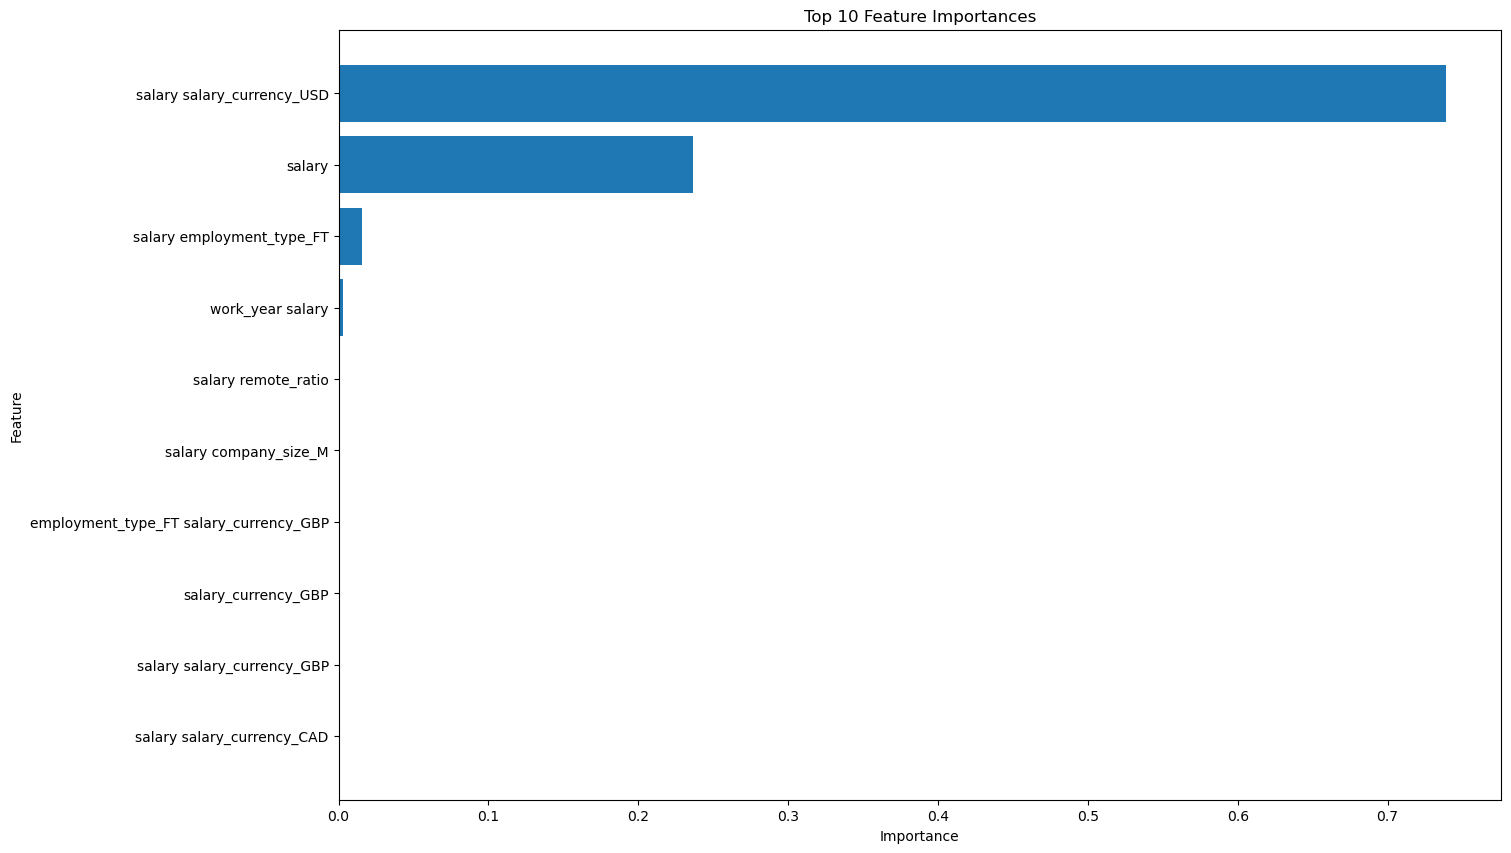

Top 10 feature importances:
1. salary salary_currency_USD (0.7387)
2. salary (0.2366)
3. salary employment_type_FT (0.0155)
4. work_year salary (0.0031)
5. salary remote_ratio (0.0003)
6. salary company_size_M (0.0003)
7. employment_type_FT salary_currency_GBP (0.0003)
8. salary_currency_GBP (0.0002)
9. salary salary_currency_GBP (0.0002)
10. salary salary_currency_CAD (0.0001)


In [53]:
# Get the top 10 features
top_n = 10
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_feature_names = poly.get_feature_names_out()[top_indices]

# Plot the top 10 feature importances
plt.figure(figsize=(15, 10))
plt.title("Top 10 Feature Importances")
plt.barh(range(top_n), top_importances, align="center")
plt.yticks(range(top_n), top_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Reverse the order of features for better readability
plt.show()

# Displaying the top 10 features with their importance scores
print("Top 10 feature importances:")
for rank, feature_name, importance in zip(range(1, top_n + 1), top_feature_names, top_importances):
    print(f"{rank}. {feature_name} ({importance:.4f})")

## Conclusion

The analysis revealed that the most significant factor influencing salary is whether the salary is in USD, followed by the salary amount itself and full-time employment status. These features have the highest importance scores and provide valuable insights into salary determinants in the tech industry.

## Key Insights:

- Currency Impact: 
Salaries in USD have the most substantial influence, indicating the importance of currency in determining salary levels.

- Employment Type: 
Full-time employment significantly impacts salaries, reflecting the stability and benefits associated with full-time roles.

- Other Factors: 
Factors like remote work ratio, company size, and specific currencies (GBP, CAD) also play minor roles.

# Future Salary Predictions

In [57]:
# Create a future dataset for the next year (e.g., 2025)
future_year = 2025
num_samples = 100  # Number of samples for the future dataset

# Generate synthetic future data based on the current distribution
future_data = df.sample(num_samples, replace=True).copy()
future_data['work_year'] = future_year

# Encode and scale future data using the same transformations
future_data_encoded = pd.get_dummies(future_data, columns=categorical_columns, drop_first=True)
future_data_encoded[numerical_columns] = scaler.transform(future_data_encoded[numerical_columns])

# Ensure all columns are present in the future data
missing_cols = set(df_encoded.columns) - set(future_data_encoded.columns)
for col in missing_cols:
    future_data_encoded[col] = 0
future_data_encoded = future_data_encoded[df_encoded.columns.drop('salary_in_usd')]

# Create polynomial features
future_data_poly = poly.transform(future_data_encoded)

# Predict future salaries using the trained polynomial Random Forest model
future_salary_predictions = poly_rf_model.predict(future_data_poly)

# Inverse transform the predicted salaries to get them back to original scale
salary_scaler = StandardScaler()
salary_scaler.fit(df[['salary_in_usd']])
future_salary_predictions_usd = salary_scaler.inverse_transform(future_salary_predictions.reshape(-1, 1))

# Add the inverse transformed predictions to the future data
future_data['predicted_salary_in_usd'] = future_salary_predictions_usd

# Find the top 10 job roles with the highest predicted salaries
top_10_job_roles = future_data[['job_title', 'predicted_salary_in_usd']].sort_values(by='predicted_salary_in_usd', ascending=False).head(10)

# Display the top 10 job roles
top_10_job_roles



,job_title,predicted_salary_in_usd
2802,Data Engineer,329218.42
16762,Software Engineer,303400.90
20854,Research Engineer,295024.70
15909,Research Scientist,287533.00
3466,Data Engineer,280759.91
21113,Research Engineer,250014.08
18095,Machine Learning Engineer,245452.32
15159,Research Scientist,240243.35
9991,Data Scientist,237012.88
21505,Data Modeler,234012.72


In [62]:
# Top 10 job roles
top_10_job_roles_list = top_10_job_roles['job_title'].unique()

# Experience levels
experience_levels = df['experience_level'].unique()

# Create a list to store future predictions
future_predictions_list = []

# Generate synthetic data for each combination of top 10 job roles and experience levels
for job in top_10_job_roles_list:
    for exp in experience_levels:
        sample_data = df.sample(1).copy()
        sample_data['work_year'] = future_year
        sample_data['job_title'] = job
        sample_data['experience_level'] = exp
        future_predictions_list.append(sample_data)

# Concatenate the list of DataFrames into a single DataFrame
future_predictions = pd.concat(future_predictions_list, ignore_index=True)

# Encode and scale future data using the same transformations
future_predictions_encoded = pd.get_dummies(future_predictions, columns=categorical_columns, drop_first=True)
future_predictions_encoded[numerical_columns] = scaler.transform(future_predictions_encoded[numerical_columns])

# Ensure all columns are present in the future data
missing_cols = set(df_encoded.columns) - set(future_predictions_encoded.columns)
for col in missing_cols:
    future_predictions_encoded[col] = 0
future_predictions_encoded = future_predictions_encoded[df_encoded.columns.drop('salary_in_usd')]

# Create polynomial features
future_predictions_poly = poly.transform(future_predictions_encoded)

# Predict future salaries using the trained polynomial Random Forest model
salary_predictions = poly_rf_model.predict(future_predictions_poly)

# Inverse transform the predicted salaries to get them back to original scale
salary_predictions_usd = salary_scaler.inverse_transform(salary_predictions.reshape(-1, 1))

# Add the inverse transformed predictions to the future data
future_predictions['predicted_salary_in_usd'] = salary_predictions_usd

# Aggregate results to calculate salary range for each job role and experience type combination
salary_ranges = future_predictions.groupby(['job_title', 'experience_level'])['predicted_salary_in_usd'].agg([np.min, np.max, np.mean])

# Display the salary ranges
salary_ranges


amin       amax       mean
job_title                 experience_level                                 
Data Engineer             EN                160079.00  160079.00  160079.00
                          EX                119985.29  119985.29  119985.29
                          MI                 94729.64   94729.64   94729.64
                          SE                188056.84  188056.84  188056.84
Data Modeler              EN                 71992.16   71992.16   71992.16
                          EX                192517.55  192517.55  192517.55
                          MI                 95183.60   95183.60   95183.60
                          SE                 71934.31   71934.31   71934.31
Data Scientist            EN                 92078.40   92078.40   92078.40
                          EX                 89989.41   89989.41   89989.41
                          MI                274946.30  274946.30  274946.30
                          SE                 79994.00   79994.00   79994.00
Machine Learning Engineer EN                329250.72  329250.72  329250.72
                          EX                119517.51  119517.51  119517.51
                          MI                185019.87  185019.87  185019.87
                          SE                123147.98  123147.98  123147.98
Research Engineer         EN                190202.05  190202.05  190202.05
                          EX                120204.88  120204.88  120204.88
                          MI                128776.93  128776.93  128776.93
                          SE                108998.06  108998.06  108998.06
Research Scientist        EN                166002.30  166002.30  166002.30
                          EX                107088.05  107088.05  107088.05
                          MI                 71919.46   71919.46   71919.46
                          SE                161997.70  161997.70  161997.70
Software Engineer         EN                149535.46  149535.46  149535.46
                          EX                 77992.16   77992.16   77992.16
                          MI                 52542.75   52542.75   52542.75
                          SE                286138.60  286138.60  286138.60

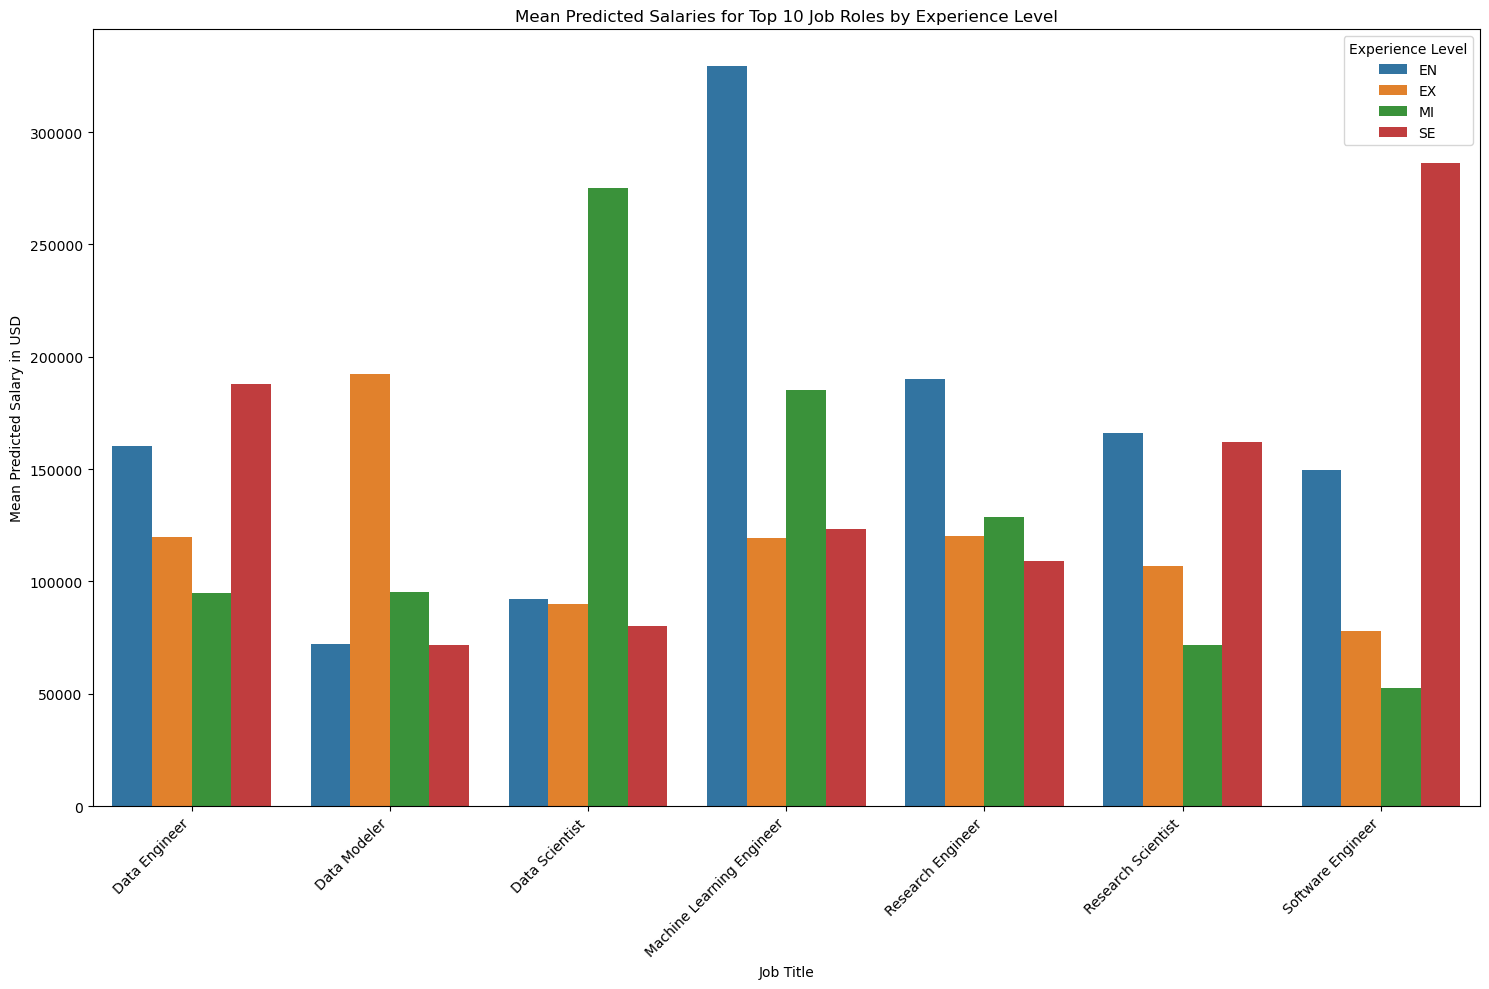

In [64]:
# Convert the salary ranges DataFrame into a more suitable format for plotting
salary_ranges = future_predictions.groupby(['job_title', 'experience_level'])['predicted_salary_in_usd'].agg([np.min, np.max, np.mean, np.median])
salary_ranges.reset_index(inplace=True)

# Bar Plot for Mean Predicted Salaries
plt.figure(figsize=(15, 10))
sns.barplot(data=salary_ranges, x='job_title', y='mean', hue='experience_level')
plt.title('Mean Predicted Salaries for Top 10 Job Roles by Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Mean Predicted Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Experience Level')
plt.tight_layout()
plt.show()
